# Theoretical intensity distributions for a focused Gaussian beam through a circular aperture

In this notebook I demonstrate how to use FocusedGaussianBeam from gaussian_beam_propagation.py to generate the theoretical distributions and plots.

In [25]:
import numpy as np
import scipy.integrate as integrate
import scipy.special as special
import matplotlib.pyplot as plt
import matplotlib.style as mplstyle
import seaborn as sns
import os

import sys
sys.path.insert(1, '../')
from src.core import gaussian_beam_propagation as gbp

sns.set_style("darkgrid", {'axes.grid' : False})
from matplotlib.colors import ListedColormap
cmap = ListedColormap(sns.cubehelix_palette(100, start=.5, rot=-.75, reverse=True))

In [5]:
# path where to save figures
PATH_FIG = "../figures/notebooks/01_focused_gaussian_beam"

In [26]:
def plot_isophotes(X: np.ndarray, Z: np.ndarray, intensity: np.ndarray, alpha: float):
    """
    Plots the intensity distribution of a Gaussian beam through a circular aperture
    with the axial and transverse profiles.

    :param X: 2D numpy array from np.meshgrid
    :param Z: 2D numpy array from np.meshgrid
    :param intensity: 2D numpy array
    :param alpha: truncation coefficient (beam parameter)
    """

    fig = plt.figure()

    ax1 = plt.subplot2grid((3, 5), (0, 0), colspan=4)
    ax3 = plt.subplot2grid((3, 5), (1, 0), colspan=4, rowspan=2)
    ax4 = plt.subplot2grid((3, 5), (1, 4), rowspan=2)

    # Transverse profiles
    extent = (X[0, 0], X[0, -1], Z[0, 0], Z[-1, 0])
    ax4.plot(intensity[:, intensity.shape[1]//2], Z[:, 0])
    ax4.set_xlabel(r'$I_{(u=0)} / I_0$')

    # Axial profiles
    ax4.set_yticklabels([])
    ax1.plot(X[0], intensity[intensity.shape[0]//2, :])
    ax1.set_ylabel(r'$I_{(v=0)} / I_0$')
    ax1.set_xticklabels([])

    # Intensity distribution with isophotes
    ax3.contour(intensity, levels=np.logspace(-4,1, 20), cmap=plt.cm.gray, linewidths=0.5, extent=extent)
    ax3.imshow(np.log(intensity), cmap=cmap, extent=extent)
    ax3.set_ylabel(r'$v$ (rad)')
    ax3.set_xlabel(r'$u$ (rad)')
    ax3.text(
        22, 10, 
        r'$\alpha$ = ' + f'{int(alpha)}', 
        bbox={'facecolor': 'white', 'pad': 10, 'edgecolor':'none'}
    )

    plt.tight_layout()

    if not os.path.exists(PATH_FIG):
        os.mkdir(PATH_FIG)
    
    plt.savefig(f'{PATH_FIG}/lommel-{alpha}.png', dpi=300)

## Initialize FocusedGaussianBeam objects

In [7]:
# create the beam objects, each beam having various truncation coefficients
beams = []
for trunc_coeff in np.arange(0, 10, 1):
    beam = gbp.FocusedGaussianBeam(NA=0.4, n=1.33, trunc_coeff=trunc_coeff)
    beams.append(beam)

/Users/hannaharjonillo/Documents/gbp-mc/notebooks/../src/core/gaussian_beam_propagation.py:58: RuntimeWarning: divide by zero encountered in scalar divide
  self.w_incident = self.aperture / np.sqrt(trunc_coeff)


### Axial intensity

Text(0, 0.5, 'Axial intensity')

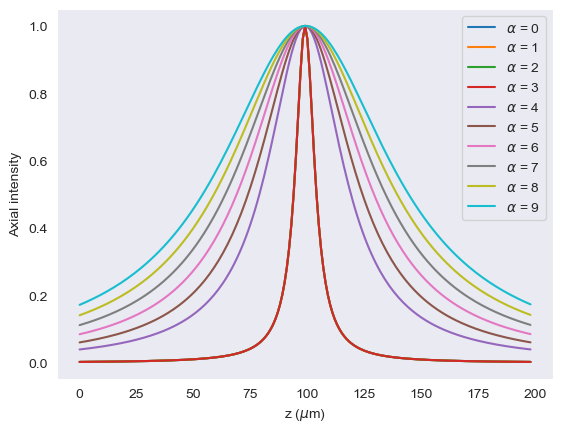

In [18]:
z = np.linspace(-30, 30, 199)
for beam in beams:
    plt.plot(beam.axial_intensity(z), label=rf"$\alpha$ = {beam.trunc_coeff}")
plt.legend(loc="best")
plt.xlabel(rf"z ($\mu$m)")
plt.ylabel("Axial intensity")

See Horvath & Bor for the details; a truncation coefficient < 4 corresponds to an untruncated beam.

### Intensity distribution with isophotes

In [19]:
# Debye approximation field for the beams
intensities = []
for beam in beams:
    u = np.linspace(-30, 30, 200, dtype=np.float64)
    v = np.linspace(-15, 15, 100, dtype=np.float64)
    
    V, U, field = beam.debye_approx_field(v, u)
    intensity = np.array(np.abs(field)**2, dtype=np.float64)
    intensity = intensity / np.amax(intensity)
    
    intensities.append(intensity / np.amax(intensity))


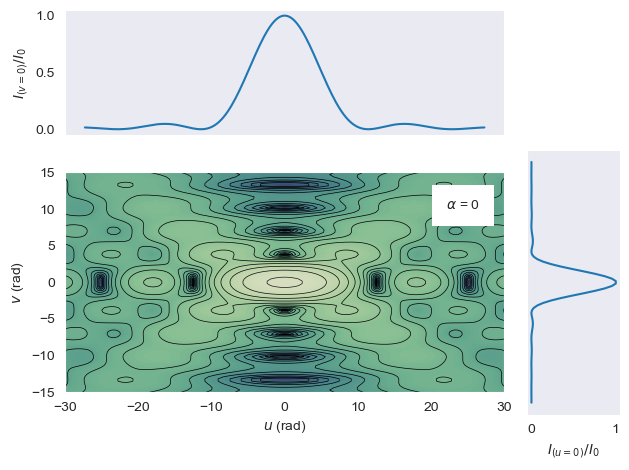

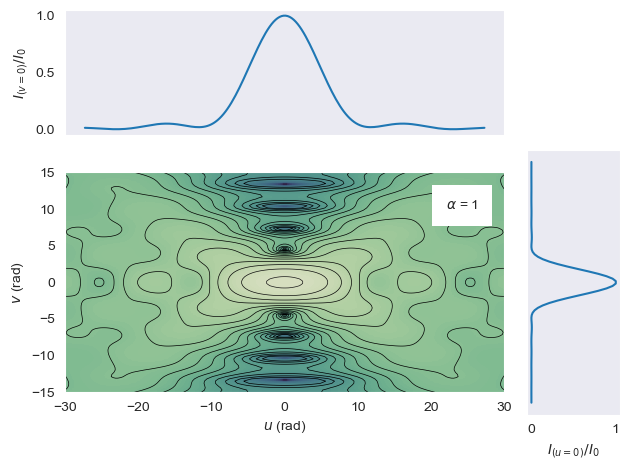

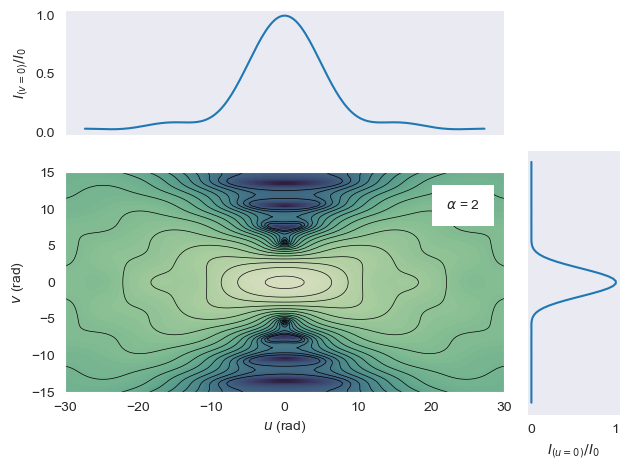

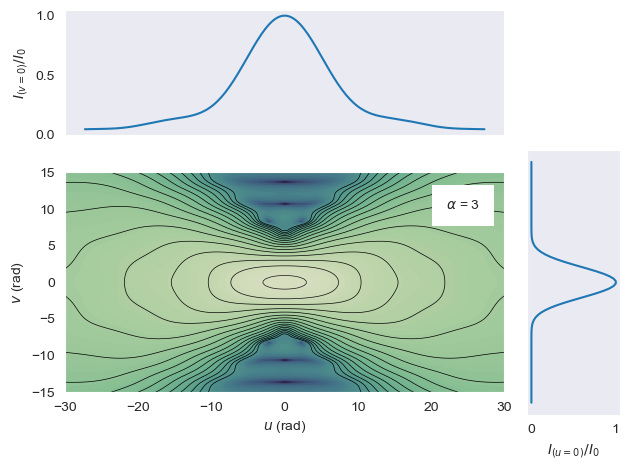

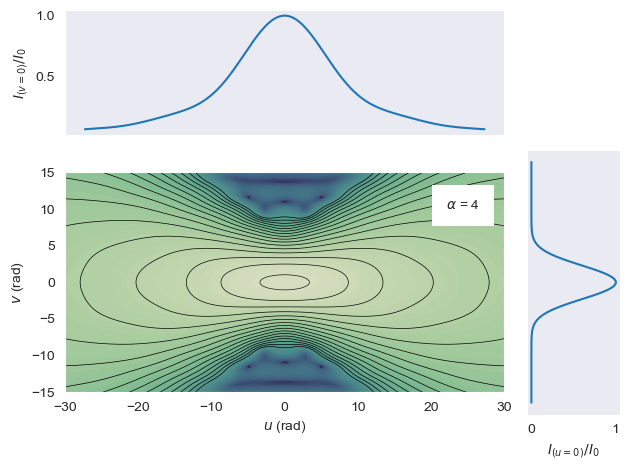

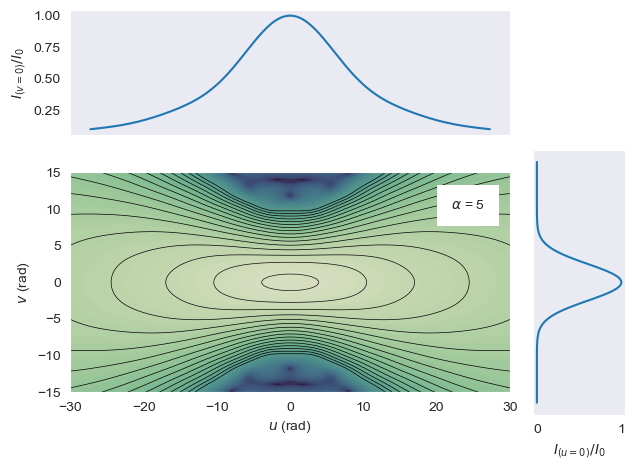

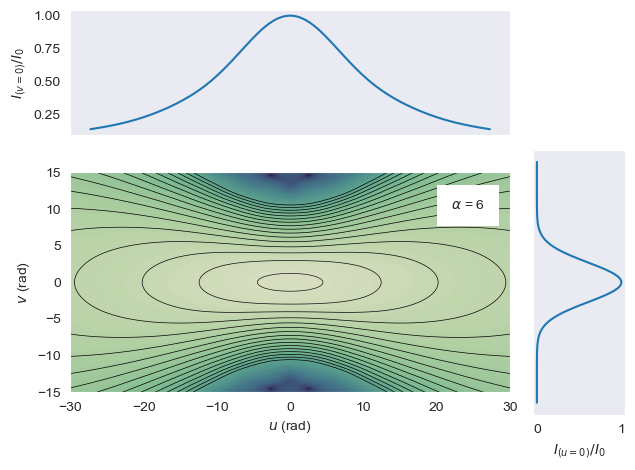

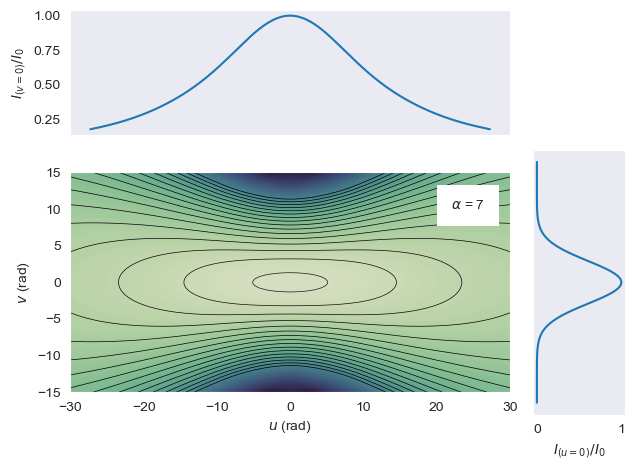

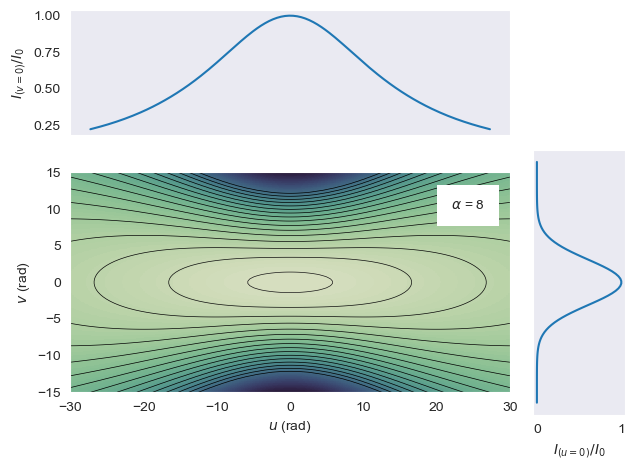

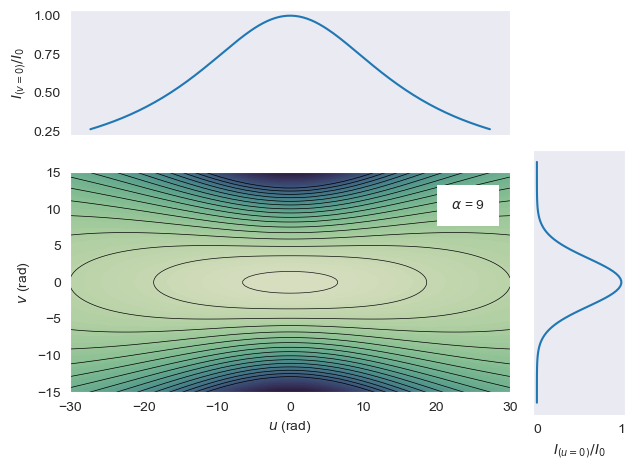

In [27]:
i = 0
for beam in beams:
    intensity = intensities[i]
    plot_isophotes(U, V, intensity, beam.trunc_coeff)    
    diff = np.abs(intensity[:, intensity.shape[1]//2]-(1/np.e**2))
    beamwaistloc = np.argmin(diff)
    i += 1

For more details on these isophotes, please check out the following references:
- Born & Wolf, Principles of Optics
- Horvath & Bor's 2003 paper